# Experiment 2

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & = 4; \\
s & >= 0; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment that linear regression should be
very good at. $F$ is a linear function of $X$, there are a small number of
features, no confounding features, and normally distributed noise. If the
world was all like this, we would have no need for anything other than 
linear regression.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = list(range(0, 21, 2))

In [5]:
SIGMA = 20.0

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearWithNoiseExperiment(m=M, s=S[3], sigma=SIGMA)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


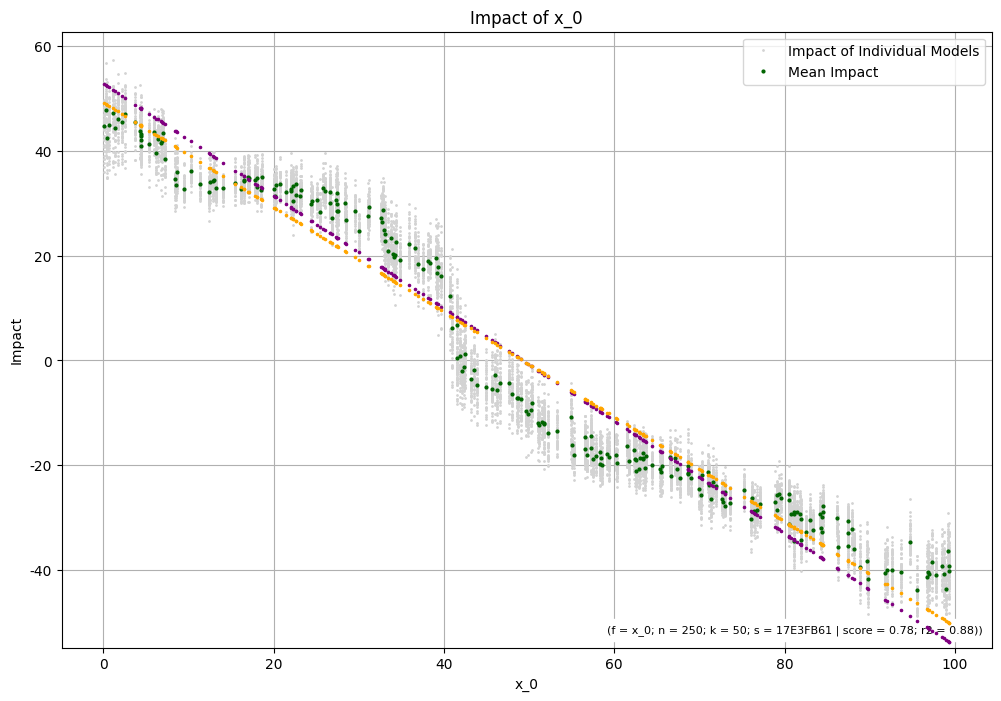

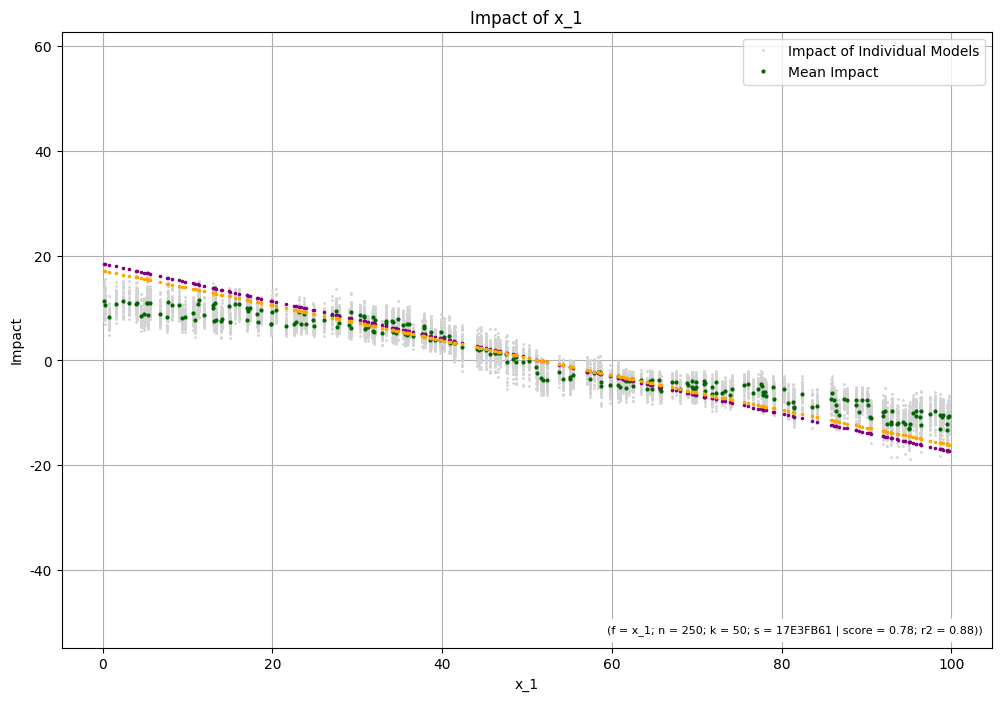

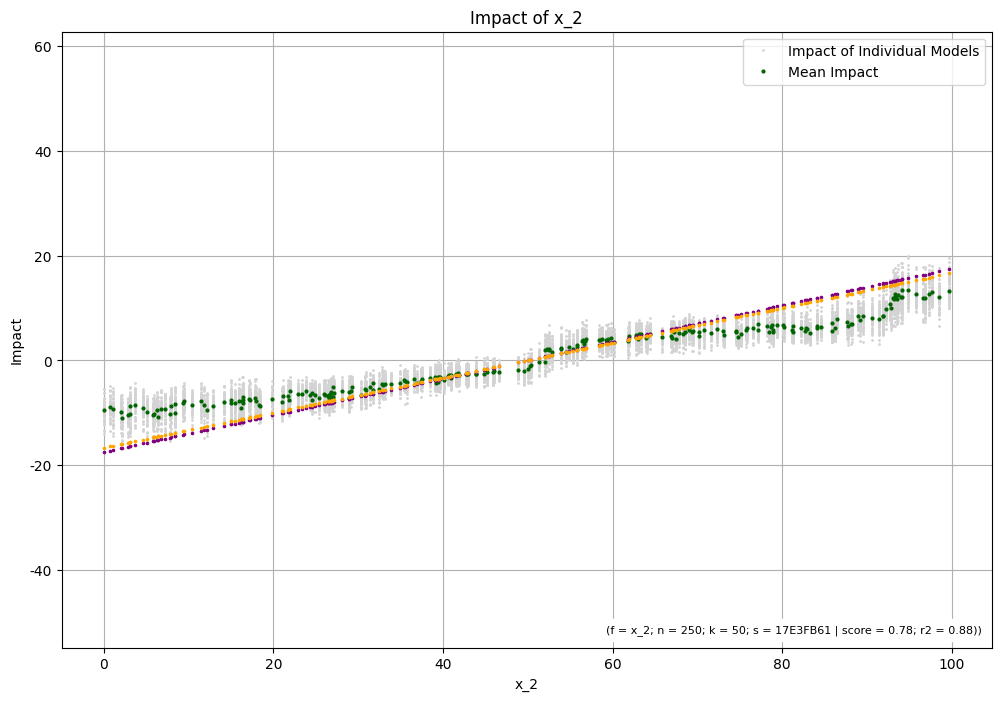

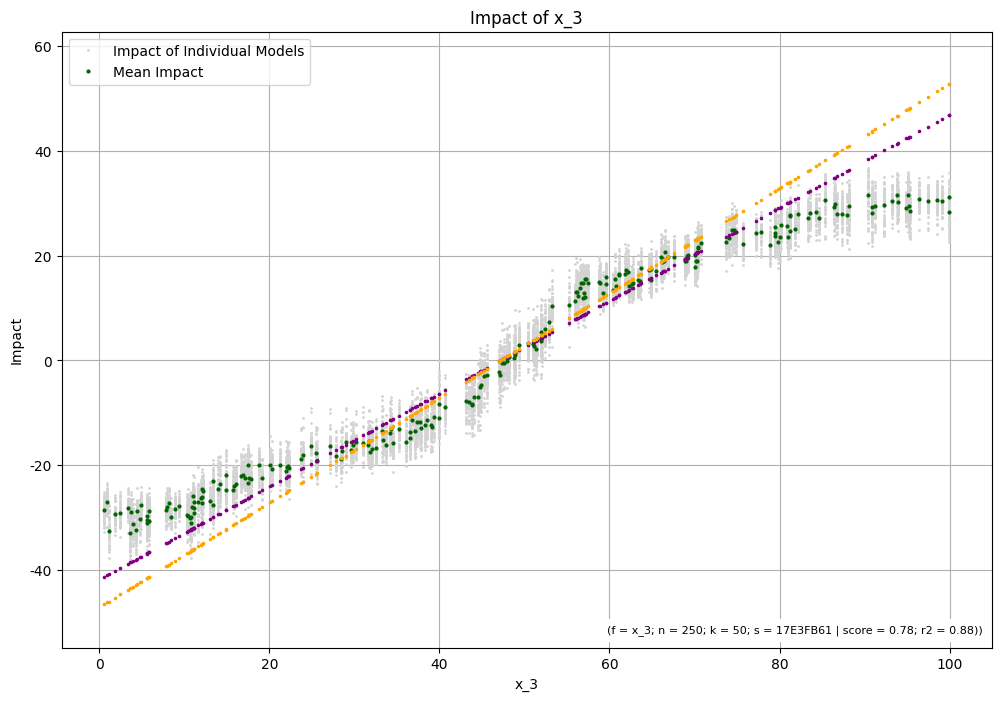

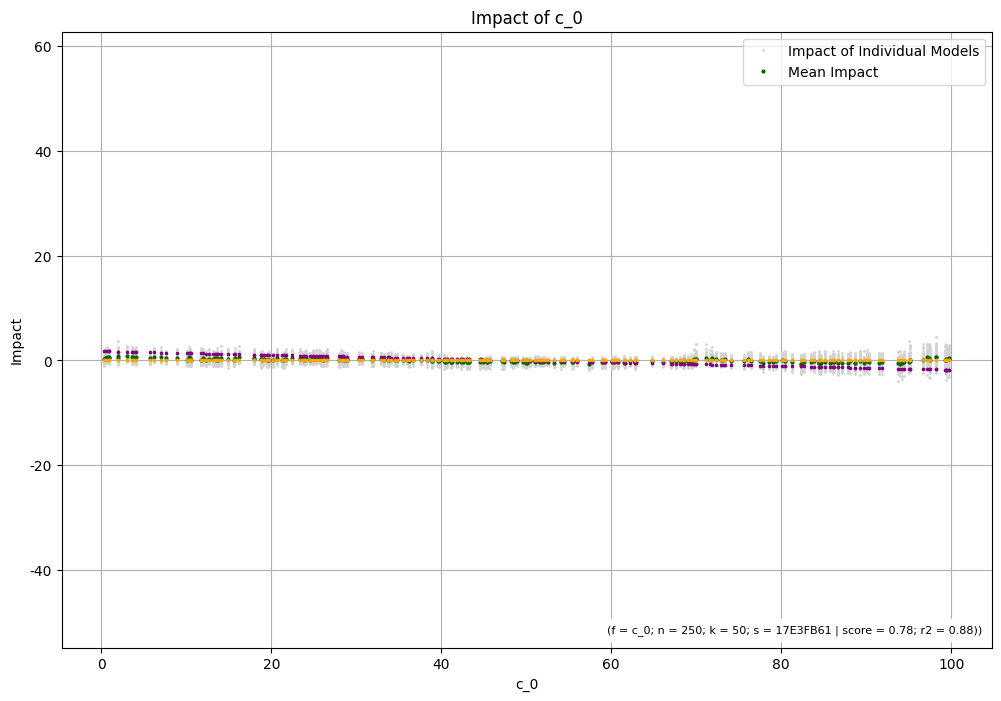

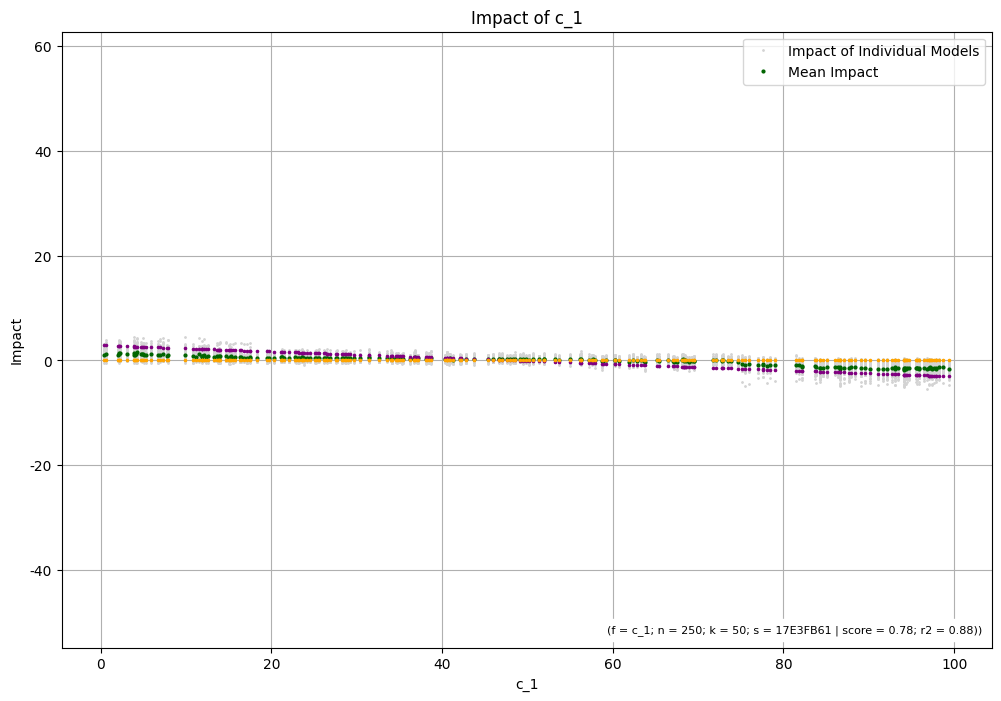

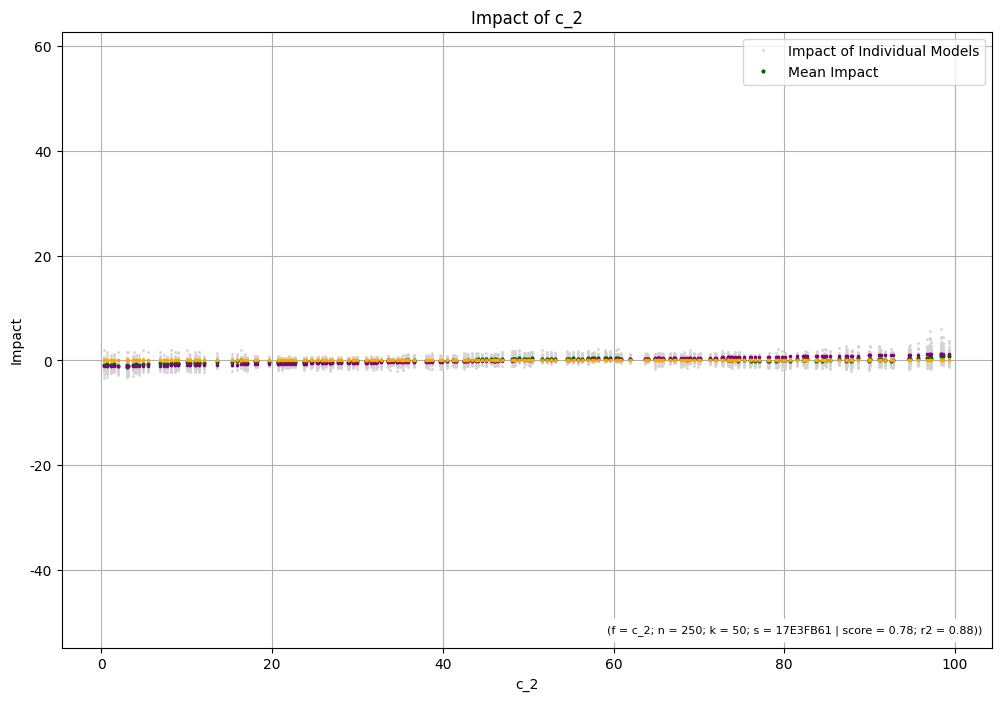

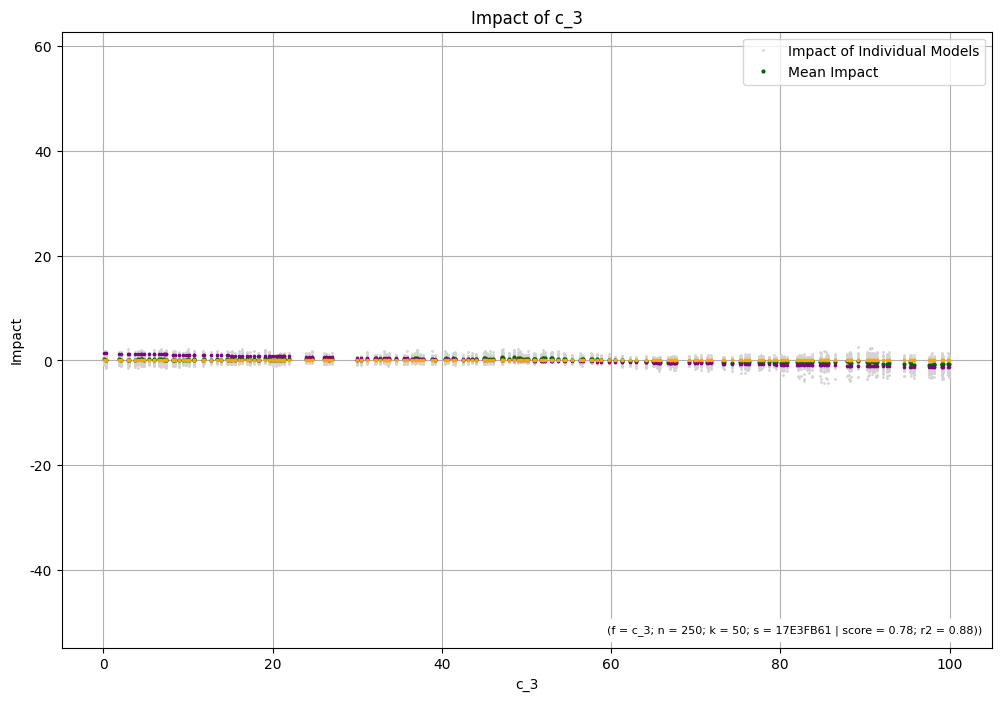

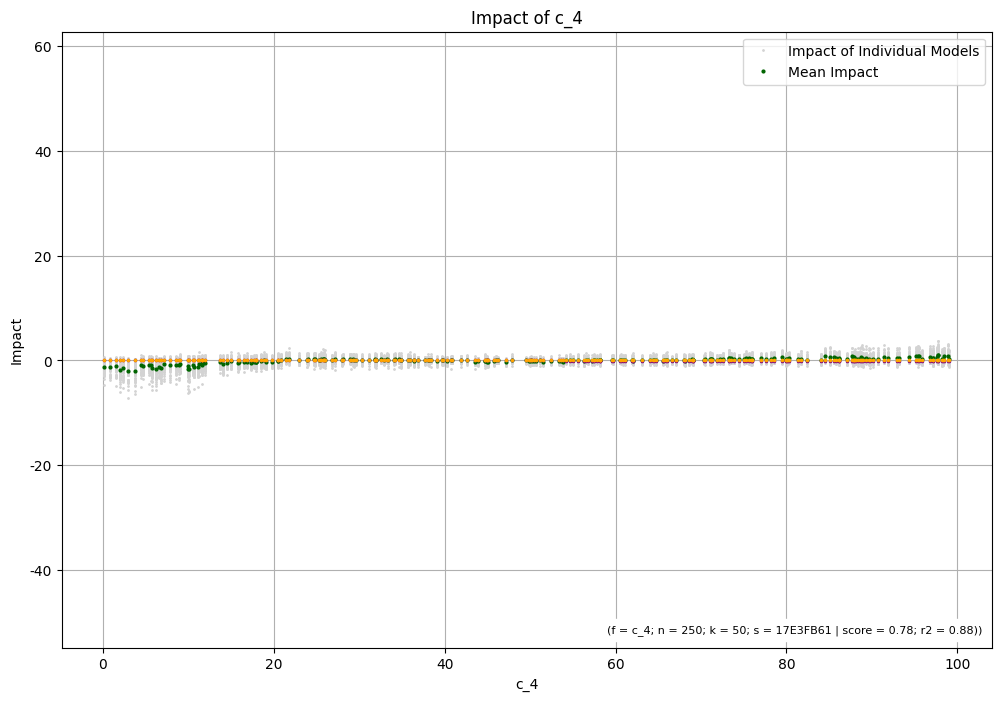

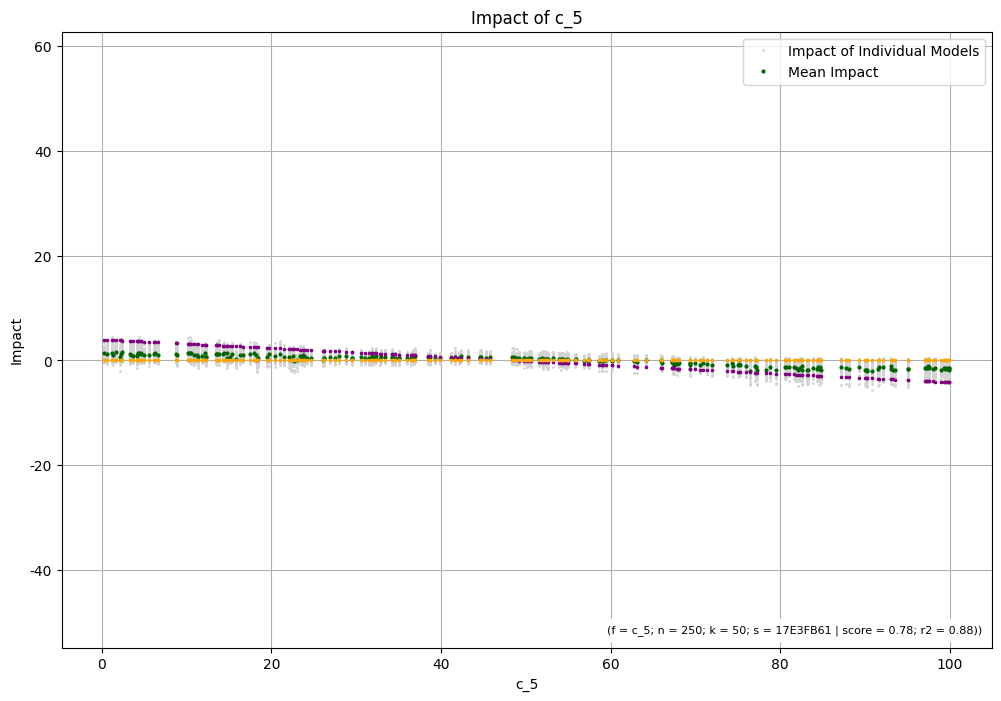

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,c_0,c_1,c_2,c_3,c_4,c_5,mu_x_i,mu_c_i
0,RMSE,6.104463,2.883013,3.009145,7.901782,0.323742,0.851911,0.374238,0.344254,0.519773,1.001341,4.974601,0.569210
0,MAE,5.258822,2.262666,2.349516,5.965496,0.280088,0.696214,0.293010,0.302177,0.353002,0.846237,3.959125,0.461788
0,MED_AE,4.978385,1.755052,1.748651,4.324152,0.246331,0.510381,0.240126,0.283348,0.235622,0.768583,3.201560,0.380732
0,LR_RMSE,2.077164,0.747584,0.454166,3.124076,1.001291,1.800933,0.660994,0.787165,0.087300,2.414406,1.600748,1.125348
0,LR_MAE,1.799914,0.652360,0.394722,2.679426,0.855022,1.583507,0.566746,0.679598,0.076063,2.078807,1.381605,0.973291
0,LR_MED_AE,1.733177,0.617850,0.378267,2.593014,0.842462,1.548710,0.551490,0.744620,0.075561,2.097722,1.330577,0.976761


## A Multi-Scenario Experiment

In [10]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA)

In [16]:
df_model_errors = experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Linear Regression')

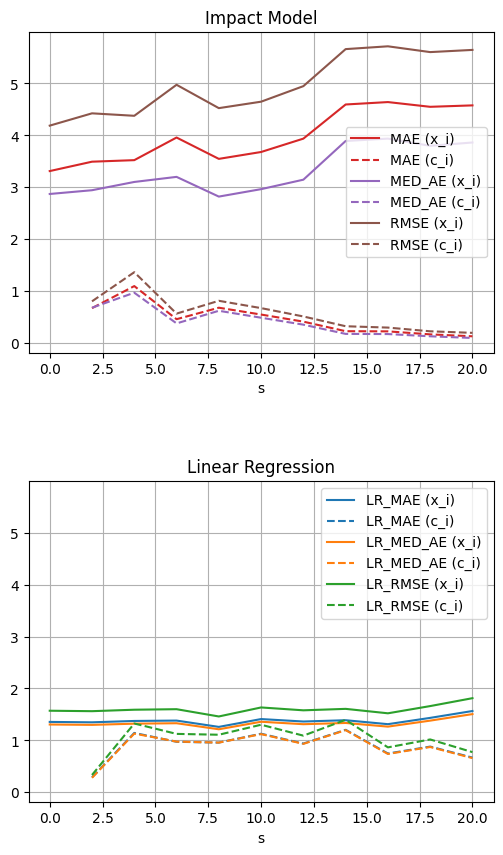

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(6, 10), sharey=True)
plt.subplots_adjust(hspace=0.4)

for ii, (name, df_group) in enumerate(df_model_errors.groupby("metric")):
    if name.startswith("LR_"):
        ax = axes[1]
    else:
        ax = axes[0]

    ax = df_group.plot("s", "mu_x_i", c=f"C{ii}", ax=ax, label=f"{name} (x_i)")
    ax = df_group.plot(
        "s", "mu_c_i", c=f"C{ii}", linestyle="dashed", ax=ax, label=f"{name} (c_i)"
    )

    ax.grid()

axes[0].set_title("Impact Model")
axes[1].set_title("Linear Regression")